# Interpolation by collocation

Say we have N samples $y_{i}=f(\boldsymbol{x}_{i})$ on training points $\boldsymbol{x}_{i}$ and also $N$ coefficients for basis functions. Then
$$
f(\boldsymbol{x}_{i})=\sum_{k=1}^{N}f_{k}\varphi_{k}(\boldsymbol{x}_{i}).
$$
Then we can solve in the coefficient vector $\boldsymbol{f}=(f_{1},f_{2},\dots f_{N})$ by defining a collocation matrix $\Phi_{ik}=\varphi_{k}(\boldsymbol{x}_{i})$ and solve the linear system
$$
\Phi\boldsymbol{f}=\boldsymbol{y}
$$
with the measured values $\boldsymbol{y}=(y_{1},y_{2},\dots,y_{N})$ on the right-hand side.

Example 1D:

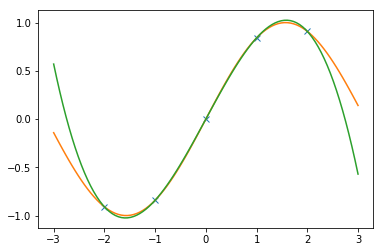

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def f(x): return np.sin(x)
def phi_bas(k, x): return hermite(k)(x)

N = 5
xtrain = np.linspace(-2, 2, N)
ytrain = f(xtrain)

# construct interpolation by collocation
P = np.zeros([N, N])

for k in np.arange(N):
    for i in np.arange(N):
        P[i,k] = phi_bas(k, xtrain[i])

fcoef = np.linalg.solve(P, ytrain)

# evaluate interpolant
xplot = np.linspace(-3, 3, 100)
yinterp = np.zeros_like(xplot)
for k in np.arange(N):
    yinterp = yinterp + fcoef[k]*phi_bas(k, xplot)

# reference exact curve
yref = f(xplot)

plt.figure()
plt.plot(xtrain, ytrain, 'x')
plt.plot(xplot, yref)
plt.plot(xplot, yinterp)

Example 2D:

Let's assume a 2D space where $N=m\times n$ and take $\varphi_{lj}(x^{1},x^{2})=e^{ilx^{1}}H_{j}(x^{2})$.Here $l=0\dots m-1$ and $j=0\dots n-1$ and we can define a 1D index $k=l\cdot m+j$. Then we just loop over $i=0\dots N-1$ and $k=0\dots N-1$ to construct $\Phi$.

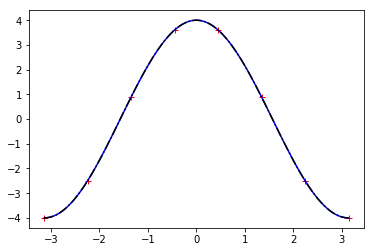

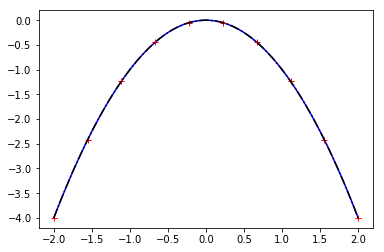

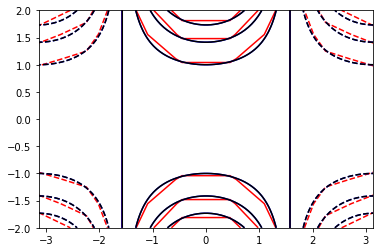

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import hermite

def f(x,y): return np.cos(x)*y**2
def phi_bas(k1, k2, x, y): return np.exp(1.0j*k1*x)*hermite(k2)(y)

n = 8
m = 10
N = n*m
xtrain = np.linspace(-np.pi, np.pi, n)
ytrain = np.linspace(-2, 2, m)
[xx,yy] = np.meshgrid(xtrain, ytrain)
zztrain = np.zeros([N])
# construct interpolation by collocation
P = np.zeros([N, N], dtype=complex)

for lk in np.arange(n):
    for jk in np.arange(m):
        for xi in np.arange(n):
            for yi in np.arange(m):
                k = lk*m + jk
                i = xi*m + yi
                P[i,k] = phi_bas(lk-n/2, jk, xtrain[xi], ytrain[yi])
                zztrain[i] = f(xtrain[xi], ytrain[yi])

fcoef_res = np.linalg.lstsq(P, zztrain, rcond=1e-15)
fcoef = fcoef_res[0]

# evaluate interpolant
Np = 100
xplot = np.linspace(-np.pi, np.pi, Np)
yplot = np.linspace(-2, 2, Np)
[xxp, yyp] = np.meshgrid(xplot, yplot)

zinterp = np.zeros([Np, Np], dtype=complex)
for lk in np.arange(n):
    for jk in np.arange(m):
        k = lk*m + jk
        zinterp = zinterp + fcoef[k]*phi_bas(lk-n/2, jk, xxp, yyp)

zinterp = np.real(zinterp)

# reference exact curve
zref = f(xxp, yyp)

ztrain = np.reshape(zztrain, [n,m])
plt.figure()
plt.plot(xtrain, ztrain[:,0], 'r+')
plt.plot(xplot, zref[0,:], 'b')
plt.plot(xplot, zinterp[0,:], 'k-.')
plt.figure()
plt.plot(yplot, zref[:,0], 'b')
plt.plot(ytrain, ztrain[0,:], 'r+')
plt.plot(yplot, zinterp[:,0], 'k-.')

plt.figure()
plt.contour(xx, yy, ztrain.T, colors='red')
plt.contour(xxp, yyp, zref, colors = 'b')
plt.contour(xxp, yyp, zinterp, colors = 'k')